# LOAN PREDICTION

## DATA CLEANING

### Handle Missing Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
TrainData = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = 0)
#print(TrainData)

In [4]:
# showing the univariant statistics for numerical variables
TrainData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
TrainData.mode()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,2500,0.0,120.0,360.0,1.0,Semiurban,Y


In [6]:
# showing the bivariant statistics between each variable with the Loan Status(Yes or No)
TrainData.groupby("Loan_Status").describe()

ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          179.0  0.541899  0.499639  0.0   
Y                      360.0  480.0          385.0  0.981818  0.133782  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [7]:
print("kurtosis: ")
TrainData.kurtosis(numeric_only=True)

kurtosis: 


ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

In [8]:
print("skew: ")
TrainData.skew(numeric_only=True)

skew: 


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [9]:
#Notes!! Conclusions to KEEP IN MIND: 
# CoapplicantIncome: 25% is $0. Later, remove tuples where CoapplicantIncome=0 and analyze on its own.
# Loan_Amount_term: Q1, Q2, Q3 = 360. Which means the data is skewed towards their favor. (360 months loan)
# STD is pretty high for ApplicantIncome=6109 and CoapplicantIncome=2926
# Credit_History: Q1, Q2, Q3 = 1. Which means that most people have credit history.
# Note: very important to treat loan term and credit history as categorical, not numerical, since its values are discrete

# skewness determines asymmetrical distribution
# · -0.5 < skewness < 0.5, the data are fairly symmetrical
# ·  -1 < skewness < — 0.5 or  0.5 < skewness < 1, the data are moderately skewed
# · skewness < -1 or skewness > 1, the data are highly skewed

# kurtosis determine the volume of the outlier
# · If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
# · A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
# · A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
# source: https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de

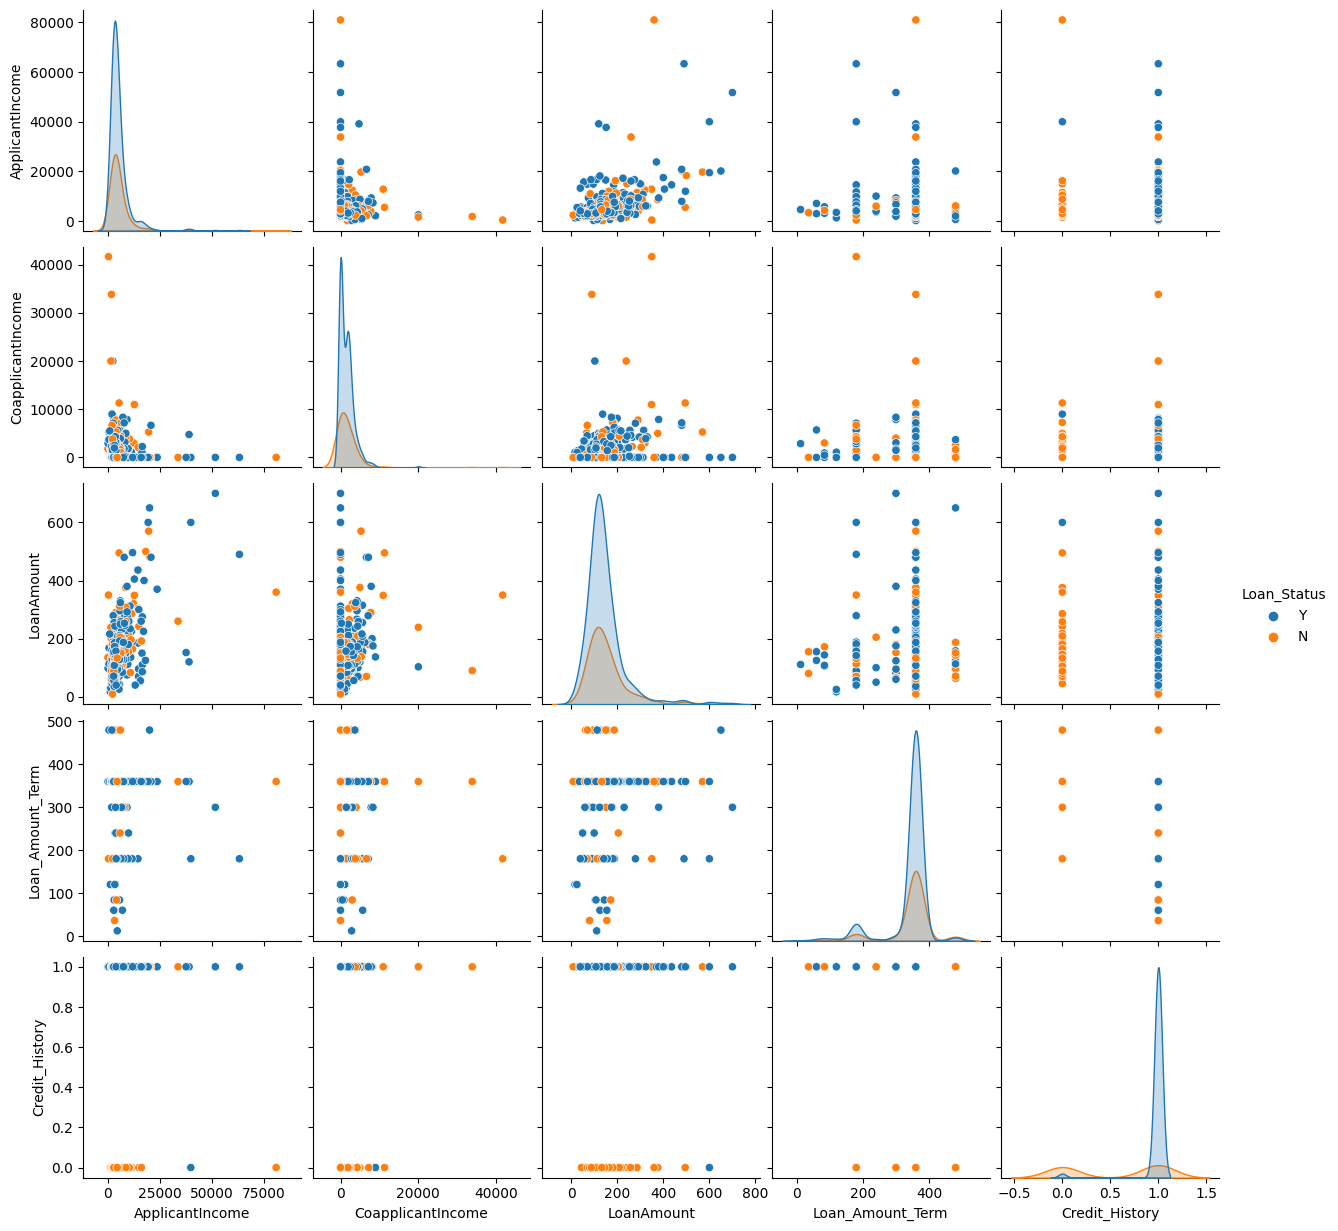

In [10]:
#Visualizing Numerical Features
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print("Description of Numerical Features:", TrainData.describe()) 


# seaborn histograms (univariate and pairwise)
# TODO tweak this so it looks better. try other things like scatter, density, histo, etc
# TODO please look up how to visualize correlation with the TARGET
# "Numerical features can be visualized by plotting their distribution and having a look at their statistical properties, 
# such as skewness and kurtosis. For categorical features, the distribution is better visualized using histograms. 
# Finally, you can calculate and visualize the correlation between the features and also the features with the target value."
# source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# tutorial (ref doc): https://seaborn.pydata.org/tutorial/distributions.html
# TODO please examine the correlation matrix results at the end of the notebook, 
# and draw a relational plot with the three most correlated values
# tutorial: https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial
# Important note: this is a very general API. You can adjust more specifically by using jointplot, scatterplot etc.
sns.pairplot(TrainData, hue = "Loan_Status")

<Axes: xlabel='Credit_History', ylabel='count'>

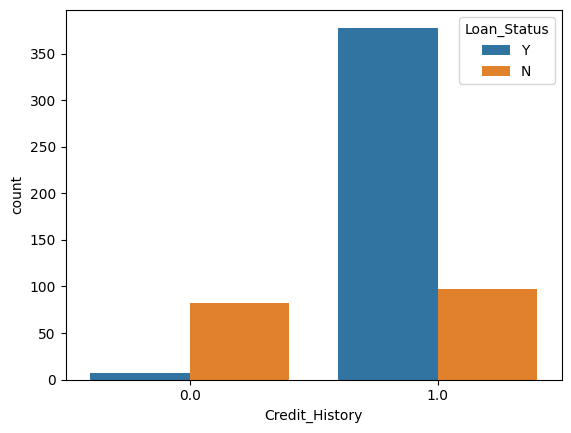

In [11]:
#Visualizing Categorical Features
#TODO use countplot to visualize univariate categorical
sns.countplot(data=TrainData,
    x="Credit_History",
    hue="Loan_Status")


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

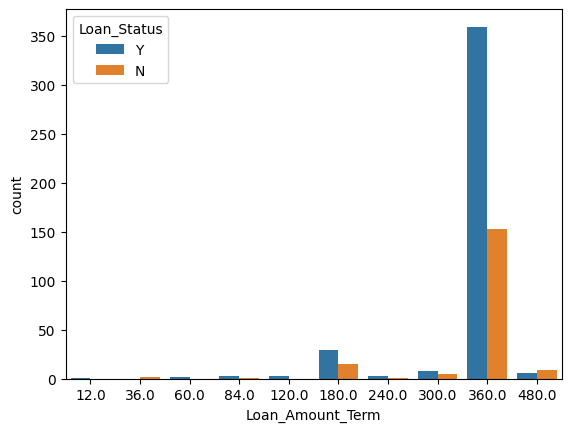

In [12]:
sns.countplot(data=TrainData,
    x="Loan_Amount_Term",
    hue="Loan_Status")

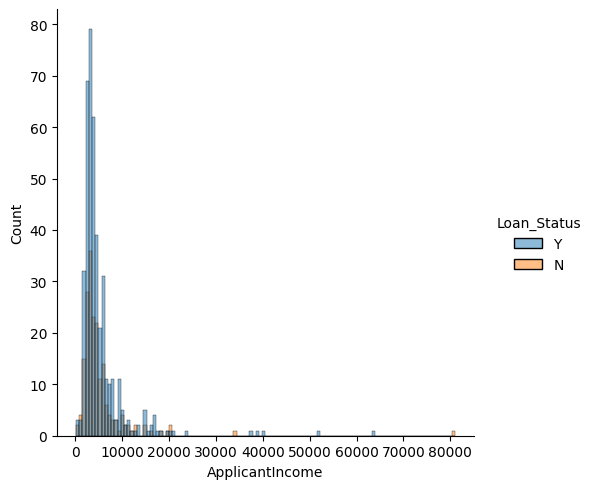

In [13]:
sns.displot(data=TrainData,
    x="ApplicantIncome", #y='ApplicantIncome',
    hue="Loan_Status")

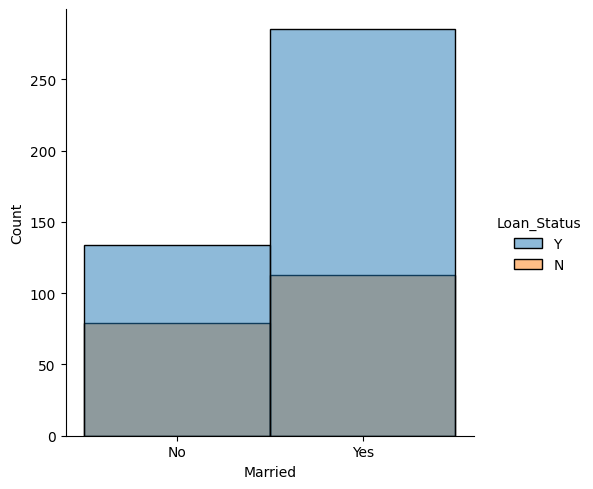

In [14]:
sns.displot(
    data=TrainData, #kind ="count",
    x="Married" , hue="Loan_Status"#, element="step"
)

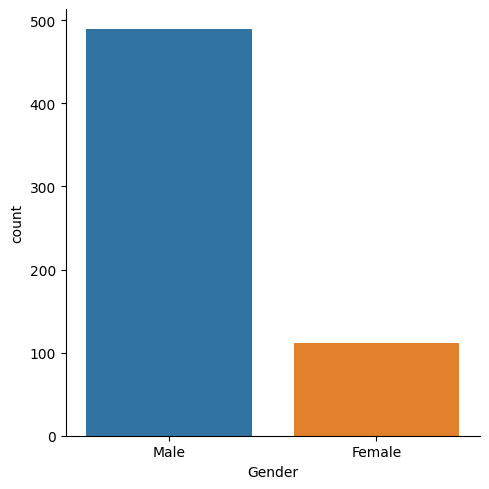

In [15]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Gender" 
)

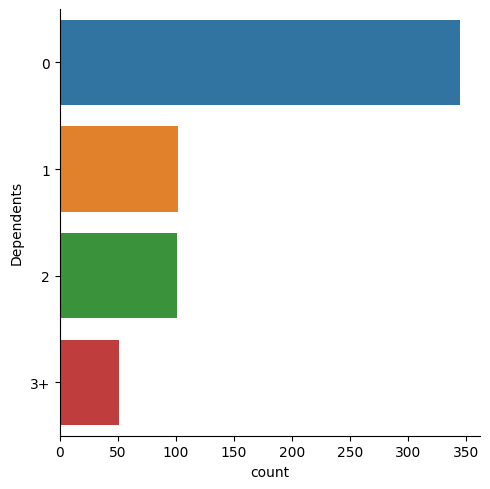

In [16]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Dependents", #hue="Loan_Status"#, palette="ch:.25" 
)

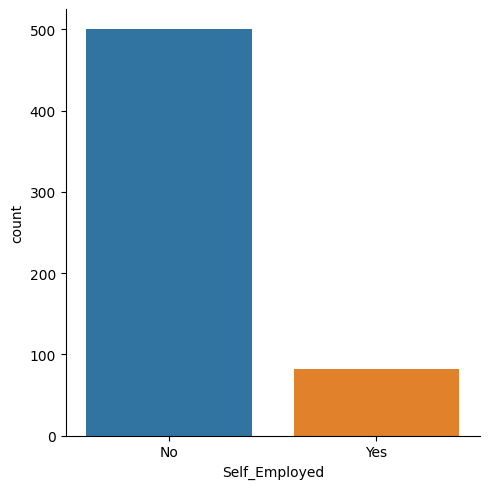

In [17]:
sns.catplot(
    data=TrainData, kind ="count",
    x="Self_Employed"
)

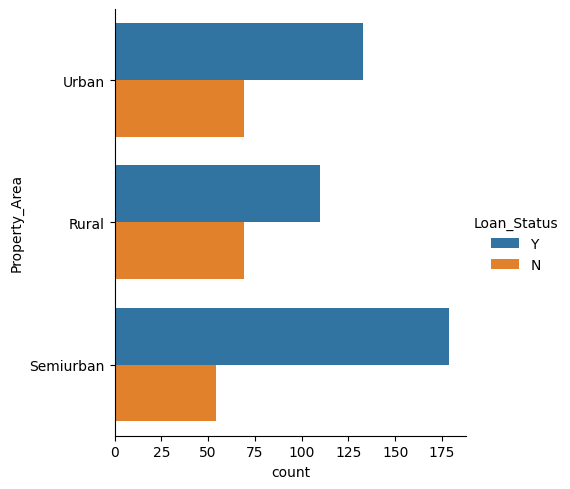

In [18]:
sns.catplot(
    data=TrainData, kind ="count",
    y="Property_Area", hue="Loan_Status"#, palette="ch:.25" 
)

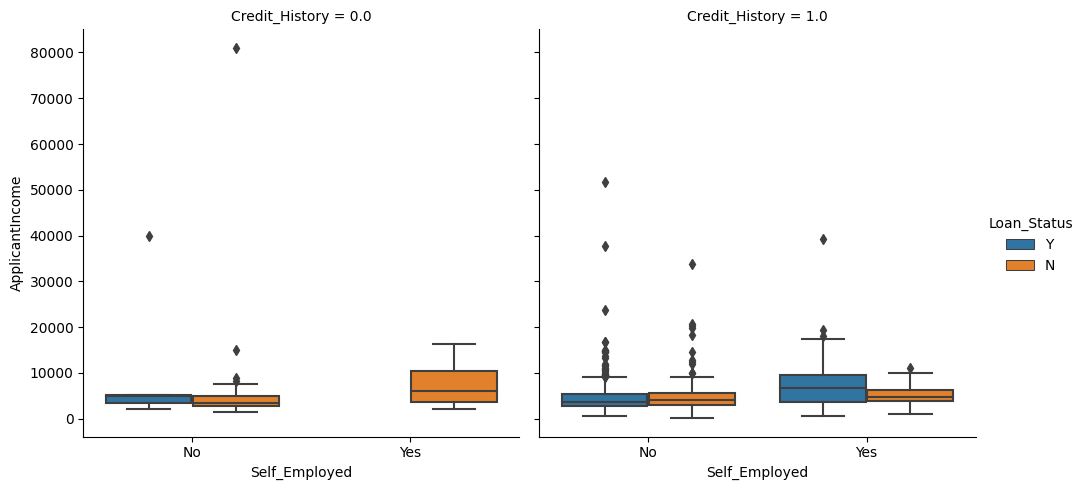

In [19]:
sns.catplot(
    data=TrainData, kind ="box", y="ApplicantIncome",
    x="Self_Employed", hue="Loan_Status", col="Credit_History"#, palette="ch:.25" 
)

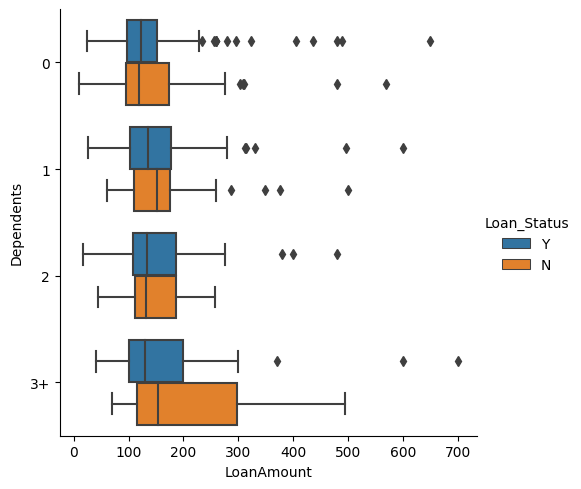

In [20]:
#catplot is used
sns.catplot(
    data=TrainData, kind ="box",
    x="LoanAmount", y="Dependents", 
    hue="Loan_Status" 
)

# When categories are harder to define, we will use binning methods.
# Scroll below to binning.

Identify missing data of both types, numerical and categorical data

In [21]:
NumericData = TrainData.select_dtypes(exclude = ['object']).columns.tolist()
TrainData_n = TrainData[NumericData]
#print(TrainData_n, '\n')

CategoricData = TrainData.select_dtypes(include = ['object']).columns.tolist()
TrainData_c = TrainData[CategoricData]
#print(TrainData_c, '\n')

In [22]:
# Drop duplicates
print(TrainData.shape)
TrainData.drop_duplicates(inplace=True)
print(TrainData.shape)

(614, 12)
(614, 12)


In [23]:
# Now, we try to figure out what kind of missing values are there. 
# “0”, “Not Applicable”, “NA”, “None”, “Null”, or “INF” all can mean that the value is missing.
for feature in TrainData.columns:
    res = list(set(TrainData[feature]))
    #print(res)

# Therefore, all missing values are np.nan or None

In [24]:
# First Approach: removing tuples. We remove tuples only if the dataset is large enough, and the tuple has multiple missing values.

print(TrainData.isnull().sum()) #returns np.na or None
print(TrainData.shape)
TrainData_nonull = TrainData.dropna(inplace=False)
print(TrainData_nonull.shape)

# Credit_History is the feature with the most missing tuples, but 50/641 is not significant enough to discard the feature entirely.
# 480/641 tuples remain. That's only around 78.18% of data. 
# Around 21.8% of data tuples have missing values. This may not be the best approach. Once the classification models are completed, 
# we can test using both datasets and evaluate their accuracy.

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 12)
(480, 12)


In [25]:
# Second Approach: Using conclusions from data visualization section, decide for each feature how to fill the missing values.
# Gender: most_frequent (male), since there is a huge variance between the two.
# Married: we can drop the 3 tuples, knowing, their effect over 614 tuples is not significant anyway.
# Dependents: knn
# Self-Employed: knn
# LoanAmount: (normally distributed variable, since mean=342, median=360, mode=360) impute with mean
# Loan_Amount_Term: impute with median
# Credit_History: knn



#TODO knn (after discretization and normalization)

#TODO later, we can fill the missing values using a regression model. (if we have time, research)



# Note: In regards to imputing missing data: "Mean is most useful when the original data is not skewed, 
# while the median is more robust, not sensitive to outliers, and thus used when data is skewed.
# "It is worth mentioning that linear regression models are sensitive to outliers.
# "𝑘 nearest neighbour imputation, which classifies similar records and put them together, can also be utilized. 
# A missing value is then filled out by finding first the 𝑘 records closest to the record with missing values. 
# Next, a value is chosen from (or computed out of) the 𝑘 nearest neighbours."
# source: https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4
# "One thing to note here is that the KNN Imputer does not recognize text data values." We must discretize categorical features first.
# "Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. 
# Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values."
# source: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
# very IMPORTANT read, for later phases, on how to structure our preprocessing + predictors: (STACKING)
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html#sphx-glr-auto-examples-ensemble-plot-stack-predictors-py

In [26]:
MostFreqImputer = SimpleImputer(missing_values = np.NaN , strategy = 'most_frequent') #cat and num
MeanImputer = SimpleImputer(missing_values = np.NaN , strategy = 'mean') #num
MedianImputer = SimpleImputer(missing_values = np.NaN , strategy = 'median') #num
#MedianCatImputer = SimpleImputer(missing_values = np.NaN , strategy = 'constant', fill_value="calc median for feature x") #cat

In [27]:
# For Gender: mode
TrainData_Gender = np.array(TrainData['Gender']).reshape(-1, 1)
MostFreqImputer.fit(TrainData_Gender)
TrainData_Gender = MostFreqImputer.transform(TrainData_Gender)
TrainData_Gender = TrainData_Gender.flatten()
#TrainData['Gender'] = TrainData_Gender

In [28]:
# For LoanAmount: mean
TrainData_LoanA = np.array(TrainData['LoanAmount']).reshape(-1, 1)
MeanImputer.fit(TrainData_LoanA)
TrainData_LoanA = MeanImputer.transform(TrainData_LoanA)
TrainData_LoanA = TrainData_LoanA.flatten()
#print(TrainData_LoanA.shape)

#TrainData['LoanAmount'] = TrainData_LoanA

In [29]:
# For Loan_Amount_Term: median
TrainData_LoanT = np.array(TrainData['Loan_Amount_Term']).reshape(-1, 1)
MedianImputer.fit(TrainData_LoanT)
TrainData_LoanT = MedianImputer.transform(TrainData_LoanT)
TrainData_LoanT = TrainData_LoanT.flatten()
print(TrainData_LoanT.shape)
#TrainData['Loan_Amount_Term'] = TrainData_LoanT

(614,)


In [30]:
# For Married: drop


# KNN

In [39]:
# Dependents: knn
# Self-Employed: knn
# Credit_History: knn


# KNN (TODO after discretization and normalization as discussed in the comments)

# To find KNN between gender and loan_status, first use encoding to convert all categoric data into numeric data
# Using LabelEncoder()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
genderlabels = label_encoder.fit_transform(TrainData['Gender'])
dependentslabels = label_encoder.fit_transform(TrainData['Dependents'])
selfemployedlabels = label_encoder.fit_transform(TrainData['Self_Employed'])
credithistorylabels = label_encoder.fit_transform(TrainData['Credit_History'])
marriedlabels = label_encoder.fit_transform(TrainData['Married'])
educationlabels = label_encoder.fit_transform(TrainData['Education'])
propertylabels = label_encoder.fit_transform(TrainData['Property_Area'])
loanstatuslabels = label_encoder.fit_transform(TrainData['Loan_Status'])


unique = np.unique(genderlabels)
print("Gender labels: ", unique)
#print(label_encoder.inverse_transform(unique))

unique = np.unique(dependentslabels)
print("Dependents labels: ", unique)
#print(label_encoder.inverse_transform(unique))

unique = np.unique(selfemployedlabels)
print("Self_Employed labels: ", unique)
#print(label_encoder.inverse_transform(unique))

unique = np.unique(credithistorylabels)
print("Credit_History labels: ", unique)
#unique = np.array(credithistorylabels)
#print(label_encoder.inverse_transform(unique))

unique = np.unique(marriedlabels)
print("Married labels: ", unique)

unique = np.unique(educationlabels)
print("Education labels: ", unique)

unique = np.unique(propertylabels)
print("Property_Area labels: ", unique)

unique = np.unique(loanstatuslabels)
print("Loan_Status labels: ", unique)


#Add to numeric table
TrainData_encoded = TrainData_c.copy()
TrainData_encoded['Gender'] = genderlabels  
TrainData_encoded['Dependents'] = dependentslabels  
TrainData_encoded['Self_Employed'] = selfemployedlabels  
TrainData_encoded['Credit_History'] = credithistorylabels  
TrainData_encoded['Married'] = marriedlabels  
TrainData_encoded['Education'] = educationlabels  
TrainData_encoded['Property_Area'] = propertylabels  
TrainData_encoded['Loan_Status'] = loanstatuslabels  



print(TrainData_encoded)

Gender labels:  [0 1 2]
Dependents labels:  [0 1 2 3 4]
Self_Employed labels:  [0 1 2]
Credit_History labels:  [0 1 2]
Married labels:  [0 1 2]
Education labels:  [0 1]
Property_Area labels:  [0 1 2]
Loan_Status labels:  [0 1]
          Gender  Married  Dependents  Education  Self_Employed  \
Loan_ID                                                           
LP001002       1        0           0          0              0   
LP001003       1        1           1          0              0   
LP001005       1        1           0          0              1   
LP001006       1        1           0          1              0   
LP001008       1        0           0          0              0   
...          ...      ...         ...        ...            ...   
LP002978       0        0           0          0              0   
LP002979       1        1           3          0              0   
LP002983       1        1           1          0              0   
LP002984       1        1           

In [31]:
#divide into categorical and numerical data: DONE
#plot nonnormalised categorical data on x axis
#plot normalised numerical data on y axis
#Normalise numerical data except Credit_History
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


TrainDataNew_n = pd.DataFrame(TrainData_encoded)
normaliser_n = MinMaxScaler(feature_range = (0,1))
exception = TrainDataNew_n.loc[:, TrainDataNew_n.columns!="Credit_History"]
normaldata_n = normaliser_n.fit_transform(exception)
#print(normaldata_n)
scaled = pd.DataFrame(normaldata_n, columns = exception.columns.values)
print(scaled)
#print(TrainDataNew_n)

NameError: name 'TrainDataNew_n' is not defined

In [115]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Gender vs Loan_Status
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(TrainData['Gender'], TrainData['Loan_Status'], marker= '*',s=100,edgecolors='black')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

In [ ]:
# Third Approach: Flagging
# Some data is missing not at random (MNAR). This means that the data is probably missing due to the feature itself.
# One example would be loan amount. If it is too high, people might refuse to say.
# Some data is missing at random. This means that the data is probably missing because of another measured variable.
# An example would be self-employment. Those working in rural areas such as farms might be trivially self-employed. We might
# trivially replace all the missing values with "No".
# Observing the data, credit history is the variable with most missing values. This may be due to applicants not being able
# to prove their credit history.
# In this case, data is missing completely at random (MCAT).
# We mention this approach, even though it may not be applicable to our project, because it is important to remember
# that even missing values can provide valuable information, which we may get rid of by imputing.

In [ ]:
print("example record: ", TrainData.values[0]) #example of record with missing num values
print("example record: ", TrainData.values[23]) #example of record with missing cat values

### Handle Noisy Data

#### Binning By pd.cut

In [ ]:
#Bin by Applicant Income, Coapplicant Income, Loan Amount
print(TrainData['ApplicantIncome'].describe())
#ApplicantIncomeCut = pd.cut(TrainData.iloc[:, 5], 4)
#print(ApplicantIncomeCut)

In [ ]:
Bins = 10
ApplicantIncomeBinSize = (81000 - 150)/Bins
print(pd.cut(TrainData['ApplicantIncome'], Bins, precision = 0).value_counts(sort=False))

In [ ]:
TrainData['ApplicantIncome_Bin'] = pd.cut(TrainData['ApplicantIncome'], Bins, labels = False)
#print(TrainData.head())                                          

In [ ]:
print(TrainData['CoapplicantIncome'].describe())

In [ ]:
print(TrainData['LoanAmount'].describe())

In [ ]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By Feature Engine

In [ ]:
import numpy.typing
from feature_engine.discretisation import EqualWidthDiscretiser
#Bin by Applicant Income, Coapplicant Income, Loan Amount
ApplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
#ApplicantIncomeFE.fit(TrainData)
#ApplicantIncomeFE.transform(TrainData)["ApplicantIncome_b"].value_counts()
#ApplicantIncomeFE = EqualWidthDiscretiser()
#print(ApplicantIncomeFE)
ApplicantIncomeFE.fit(TrainData)
ApplicantIncomeFE.transform(TrainData)["ApplicantIncome"].value_counts()

In [ ]:
CoapplicantIncomeFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
CoapplicantIncomeFE.fit(TrainData)
CoapplicantIncomeFE.transform(TrainData)["CoapplicantIncome"].value_counts()

In [ ]:
LoanAmountFE = EqualWidthDiscretiser(bins=10, return_object = True, return_boundaries = True)
LoanAmountFE.fit(TrainData)
LoanAmountFE.transform(TrainData)["LoanAmount"].value_counts()

In [ ]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

#### Binning By KBinsDiscretizer 

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

In [ ]:
#Default bins
TrainDataAmounts = TrainData[NumericData]
print(TrainDataAmounts)
TrainDataEqual = KBinsDiscretizer(n_bins = 10, strategy = 'quantile', encode = 'ordinal')
n = TrainDataEqual.fit(TrainDataAmounts)
print(n.bin_edges_)

In [ ]:
# When categories are harder to define, we will use binning methods.

#TODO move this to after Binning and (maybe) change up the binned vars
# sns.scatterplot( data=TrainData,
#     x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status" #col="Loan_Status  ", style="smoker", size="size",
# )

### Data Discretization

In [ ]:
# Remove irrelevant data
TrainData.corr()
# TODO move this to after discretization, and check it with loan_status. if weakly correlated with loan_status, you can remove the feature
# TODO we can carry out dimensionality reduction

### Data Normalization

#### Using Z-score

In [ ]:
# Analyze their impact, then decide whether to remove the outliers
# We can also use regression to get standardized_residuals and analyze the outliers

## Regression

### Single Linear Regression

In [ ]:
import numpy as np
import pandas as pd

x = TrainData['ApplicantIncome']
y = TrainData['ApplicantIncome']

In [ ]:
#Linear Regression of ApplicantIncome and LoanAmount
ApplicantIncomeMean = sum(TrainData['ApplicantIncome'])/614
LoanAmountMean = sum(TrainData['LoanAmount'])/614
print("ApplicantIncomeMean: ", ApplicantIncomeMean,'\n')
print("LoanAmountMean: ", LoanAmountMean, '\n')

In [ ]:
xxtotal = 0
xytotal = 0
for i in range(614):
    xdiff = (x[i] - ApplicantIncomeMean)**2
    #print("x:", xdiff)
    xxtotal = xxtotal + xdiff
    ydiff = (x[i] - ApplicantIncomeMean) * (y[i] - LoanAmountMean)
    #print("y:", ydiff)
    xytotal = xytotal + ydiff

#Sumxx = np.sum(xdiff, axis = 0, keepdims = True)
#Sumxy = np.sum(ydiff, axis = 0, keepdims = True)
print("SSx: ", "{0: .3f}".format(xxtotal), '\n')
print("SPxy: ", "{0: .3f}".format(xytotal), '\n')

In [ ]:
slope = xytotal / xxtotal
print("Slope: ", "{0: .3f}".format(slope), '\n')
intercept = LoanAmountMean - (slope * ApplicantIncomeMean)
print("Intercept: ", "{0: .3f}".format(intercept), '\n')
print("y = ", slope, "x + ", intercept, '\n')

In [ ]:
predicted = []
residual = []
#residual = predicted - actual
for p in range(len(x)):
    #predicted = slope * (x[p]) + intercept
    predicted.append(slope * (x[p]) + intercept)
    residual.append(predicted[p] - y[p])
    #print("x:", x[p]," y:", y[p], "predicted:", "{0: .2f}".format(predicted[p]), "residual:", "{0: .2f}".format(residual[p]))

#residual = predicted[p] - y[p]
#residual.append(predicted - y[p])

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from numpy import ndarray
from numpy.linalg import eig

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color = "black", alpha = 0.5, s = 10)
plt.plot(x, predicted, color = "red")
plt.margins(x = 0, y = 0) 
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools

standardised_residuals = residual / np.std(residual)
#print(standardised_residuals)
plt.figure(figsize=(6,6))
plt.scatter(x, residual, color = "orange", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

#Sample points from the above graph 
def select_subset(seq, size):
    return seq[:size]

plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

Xi_sample = [select_subset(x, 100)]
Yi_sample = [select_subset(residual, 100)]
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.scatter(Xi_sample, 
            Yi_sample, 
            marker="o", color="blue", alpha = 0.5 , s = 50)

In [ ]:
'''fig,ax = plt.subplots(6,6)
ax.plot(x, residual)
ax_zoom = plottools.zoom_axes(fig,ax,[0,20000],[-1.0,-0.8],[40000,-0.8],[40000,-0.8])
ax_zoom.plot(x,y)
plt.show()'''

### Multilinear Regression : Dependents and Property and Income VS Loan Amount

In [ ]:
#X = TrainData[['Dependents','Property_Area','ApplicantIncome']]
X = TrainData[['ApplicantIncome', 'CoapplicantIncome']]
Y = TrainData['LoanAmount']

In [ ]:
from sklearn import linear_model

In [ ]:
MultiReg = linear_model.LinearRegression()
MultiReg.fit(X, Y)

In [ ]:
LoanPredicted = MultiReg.predict([[1000, 1300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[2000, 2300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[3000, 3300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[4000, 4300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[5000, 5300]])
print(LoanPredicted)
LoanPredicted = MultiReg.predict([[6000, 6300]])
print(LoanPredicted)

### Clustering By KMeans

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
TrainDataK = pd.read_csv("Train Data.csv", delimiter = ',', header = 0, index_col = "Loan_ID")
print(TrainDataK)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
KMeanEncoder = LabelEncoder()

KMeanEncoder.fit(TrainDataK["LoanAmount"])
TrainDataK["LoanAmount"] = KMeanEncoder.transform(TrainDataK["LoanAmount"])
KMeanEncoder.fit(TrainDataK["Gender"])
TrainDataK["Gender"] = KMeanEncoder.transform(TrainDataK["Gender"])
KMeanEncoder.fit(TrainDataK["Married"])
TrainDataK["Married"] = KMeanEncoder.transform(TrainDataK["Married"])
KMeanEncoder.fit(TrainDataK["Dependents"])
TrainDataK["Dependents"] = KMeanEncoder.transform(TrainDataK["Dependents"])
KMeanEncoder.fit(TrainDataK["Education"])
TrainDataK["Education"] = KMeanEncoder.transform(TrainDataK["Education"])

KMeanEncoder.fit(TrainDataK["Self_Employed"])
TrainDataK["Self_Employed"] = KMeanEncoder.transform(TrainDataK["Self_Employed"])
KMeanEncoder.fit(TrainDataK["ApplicantIncome"])
TrainDataK["ApplicantIncome"] = KMeanEncoder.transform(TrainDataK["ApplicantIncome"])
KMeanEncoder.fit(TrainDataK["CoapplicantIncome"])
TrainDataK["CoapplicantIncome"] = KMeanEncoder.transform(TrainDataK["CoapplicantIncome"])
KMeanEncoder.fit(TrainDataK["Loan_Amount_Term"])
TrainDataK["Loan_Amount_Term"] = KMeanEncoder.transform(TrainDataK["Loan_Amount_Term"])
KMeanEncoder.fit(TrainDataK["Credit_History"])
TrainDataK["Credit_History"] = KMeanEncoder.transform(TrainDataK["Credit_History"])
KMeanEncoder.fit(TrainDataK["Property_Area"])
TrainDataK["Property_Area"] = KMeanEncoder.transform(TrainDataK["Property_Area"])
KMeanEncoder.fit(TrainDataK["Loan_Status"])
TrainDataK["Loan_Status"] = KMeanEncoder.transform(TrainDataK["Loan_Status"])

In [ ]:
KMeanClusters = KMeans(n_clusters = 5).fit(TrainDataK.iloc[:, :])
print(KMeanClusters.labels_, '\n')
print(KMeanClusters.cluster_centers_, '\n')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#DOWNLOAD PLOTTOOLS VIA CMD PROMPT:::import plottools
XDep = TrainDataK['LoanAmount']
plt.figure(figsize=(6,6))
plt.scatter(XDep, KMeanClusters.labels_, color = "red", alpha = 0.5 , s = 10)
#plt.scatter(XDep, KMeanClusters.cluster_centers_, color = "black", alpha = 0.5 , s = 10)
plt.grid()
plt.xlabel('Dependent var')
plt.ylabel('Clusters')
#plt.margins(x = 0, y = 0) 
plt.axis('auto')
plt.show()

### Clustering By KMedoids

In [ ]:
import numpy as np
from sklearn_extra.cluster import KMedoids

In [ ]:
X = np.asarray([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
kmedoids.labels_
array([0, 0, 0, 1, 1, 1])
kmedoids.predict([[0,0], [4,4]])
array([0, 1])
kmedoids.cluster_centers_
array([[1., 2.],
       [4., 2.]])
kmedoids.inertia_

## the correlations and their visualization


In [ ]:
corr_matrix = TrainData.corr()
print(corr_matrix)

In [ ]:
#the following is the visualization of the correlation matrix which shows the strength of the relation between each 2 variables
# you will find that we did not visualize the variable with itself because it will always be (1)

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="CoapplicantIncome")
# negative weak relation

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="LoanAmount")
#positive medium relation

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="Loan_Amount_Term")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="Credit_History")
# no relation (<0.3)

In [1]:
sns.scatterplot(data=TrainData, x="ApplicantIncome", y="ApplicantIncome_Bin")
#very strong positive relation

NameError: name 'sns' is not defined

In [ ]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="ApplicantIncome")
#  weak negative relation

In [ ]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="LoanAmount")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="Loan_Amount_Term")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="Credit_History")
# no relation(<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="CoapplicantIncome", y="ApplicantIncome_Bin")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="ApplicantIncome")
# medium positive relation

In [ ]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="CoapplicantIncome")
# weak positive relation

In [ ]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="Loan_Amount_Term")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="Credit_History")
#no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="LoanAmount", y="ApplicantIncome_Bin")
# medium positive relation

In [ ]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="ApplicantIncome")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="CoapplicantIncome")
#no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="LoanAmount")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="Credit_History")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Loan_Amount_Term", y="ApplicantIncome_Bin")
# no relation(<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Credit_History", y="ApplicantIncome")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Credit_History", y="CoapplicantIncome")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Credit_History", y="LoanAmount")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Credit_History", y="Loan_Amount_Term")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="Credit_History", y="ApplicantIncome_Bin")
# no relation (<0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="ApplicantIncome")
# strong positive relation

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="CoapplicantIncome")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="LoanAmount")
#medium positive relation

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="Loan_Amount_Term")
# no relation (<-0.3)

In [ ]:
sns.scatterplot(data=TrainData, x="ApplicantIncome_Bin", y="Credit_History")
# no relation (<0.3)